In [1]:
from fit_types import fit_unbinned_double_gauss, fit_unbinned_gauss
import uproot as up
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import pandas as pd
import mplhep as hep
hep.style.use(hep.style.CMS)
import ROOT
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/10


In [2]:
# open the file
file = up.open('../output/ZmmMCOut.root')
events = file['ntuple;1']
columns = ['Y_TriggerPath',
           'Z_soft1', 'Z_soft2',
           'Z_mass',
           'Z_pt1', 'Z_pt2', 'Z_eta1', 'Z_eta2',
           'Z_lowPt', 'Z_highPt',
           'Z_trackIso1', 'Z_trackIso2',
           'Y_mass',
           'Y_pt1', 'Y_pt2', 'Y_eta1', 'Y_eta2',
           'Y_mvaIsoWP90_1', 'Y_mvaIsoWP90_2',
           'Z_VtxProb', 'Y_VtxProb',
           'FourL_mass', 'FourL_VtxProb']
# branches = events.arrays(columns, entry_start=430, entry_stop=450)
branches = events.arrays(columns)

Text(1, 0, 'Y_mass')

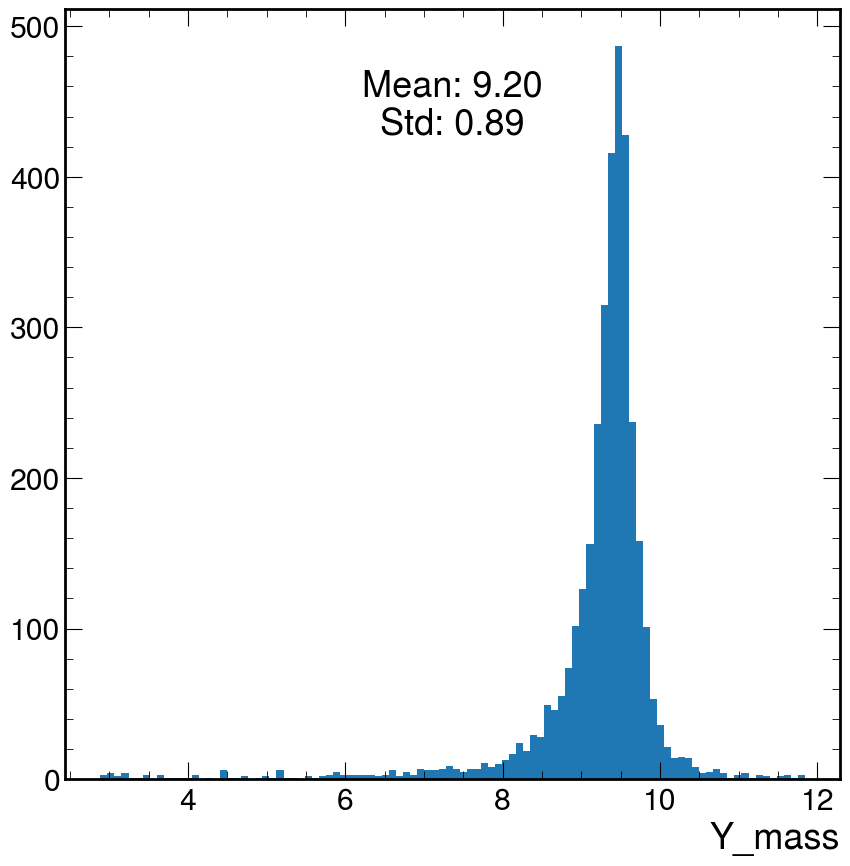

In [4]:
Y_candidates = ak.flatten(branches['Y_mass']).to_numpy()
plt.hist(Y_candidates, bins=100)

# Calculate mean and standard deviation
mean_Y = np.mean(Y_candidates)
std_Y = np.std(Y_candidates)

# Annotate mean and standard deviation on the plot
plt.text(0.5, 0.9, f'Mean: {mean_Y:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f'Std: {std_Y:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel("Y_mass")

In [ ]:
Y_mass = ROOT.RooRealVar("Y_mass", "Dielectron inv. Mass", min(Y_candidates), max(Y_candidates), "GeV")
data = ROOT.RooDataSet.from_numpy({f"Y_mass": Y_candidates}, [Y_mass])

(array([  3.,   4.,   2.,   4.,   1.,   1.,   3.,   0.,   3.,   1.,   1.,
          1.,   1.,   3.,   0.,   1.,   0.,   6.,   1.,   1.,   2.,   0.,
          1.,   2.,   1.,   6.,   1.,   1.,   0.,   2.,   1.,   2.,   3.,
          5.,   3.,   3.,   3.,   3.,   3.,   2.,   3.,   6.,   2.,   5.,
          3.,   7.,   6.,   6.,   7.,   9.,   7.,   5.,   7.,   7.,  11.,
          8.,  10.,  13.,  17.,  24.,  19.,  29.,  28.,  49.,  46.,  55.,
         74., 102., 126., 156., 236., 315., 416., 487., 428., 237., 158.,
        101.,  53.,  36.,  21.,  14.,  15.,  14.,   8.,   4.,   5.,   7.,
          4.,   1.,   3.,   4.,   1.,   3.,   2.,   1.,   2.,   3.,   1.,
          3.]),
 array([ 2.88735199,  2.9768858 ,  3.0664196 ,  3.15595341,  3.24548721,
         3.33502102,  3.42455482,  3.51408863,  3.60362244,  3.69315624,
         3.78269005,  3.87222385,  3.96175766,  4.05129147,  4.14082527,
         4.23035908,  4.31989288,  4.40942669,  4.49896049,  4.5884943 ,
         4.67802811,  4.76

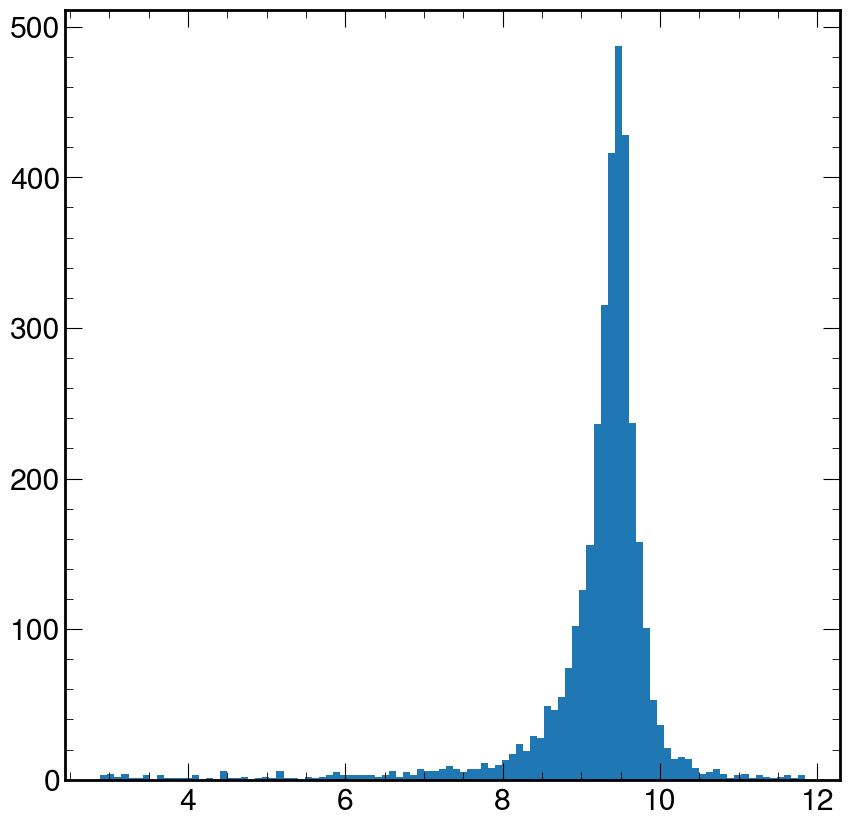

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (gaussian,background_model)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 background  -1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     2 f_bkg        5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     3 f_sig        5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     4 mean         9.00000e+00  2.00000e-01    8.00000e+00  1.00000e+01
     5 sigma        2.00000e+00  9.50000e-01    1.00000e-01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 *

Info in <TCanvas::Print>: png file Y_candidates.png has been created


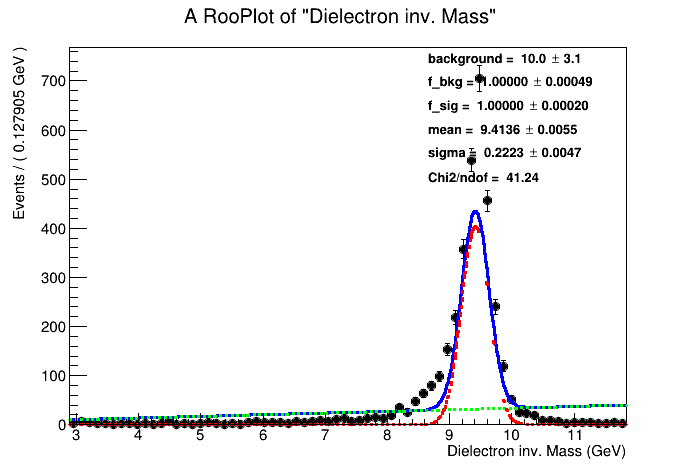

In [4]:
frame = fit_unbinned_gauss(data, Y_mass)
# Draw the frame on the canvas
canvas = ROOT.TCanvas("canvas", "Y Candidates")
frame.Draw()
canvas.Draw()
canvas.SaveAs("Y_candidates.png")